#                                        # SENTIMENT ANALYSIS
-Sentiment analysis is the act of analysing words to determine the sentiments and opinions that may be in positive or negative in polarity. 

In [1]:
#libraries to import!
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")# code that generates warnings goes here

In [2]:
#importing the datassets!
df_SA1 = pd.read_csv("C:/Users/yuvak/OneDrive/Desktop/SA/SA1.csv")
df_SA2 = pd.read_csv("C:/Users/yuvak/OneDrive/Desktop/SA/SA2.csv")
df_SA3 = pd.read_csv("C:/Users/yuvak/OneDrive/Desktop/SA/SA3.csv")

In [3]:
#contactinating the three datasets!
df_SA = pd.concat([df_SA1, df_SA2, df_SA3], ignore_index=True)

In [4]:
#Exploratory Data Analysis!
df_SA.shape

(31531, 15)

In [5]:
df_SA.info()  #info of the dataset driven!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31531 entries, 0 to 31530
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31530 non-null  object 
 2   sentiment         31015 non-null  object 
 3   Time of Tweet     31015 non-null  object 
 4   Age of User       31015 non-null  object 
 5   Country           31015 non-null  object 
 6   Population -2020  31015 non-null  float64
 7   Land Area (Km²)   31015 non-null  float64
 8   Density (P/Km²)   31015 non-null  float64
 9   fourth_column     516 non-null    float64
 10  count_no          516 non-null    float64
 11  Date & Time       516 non-null    object 
 12  name              516 non-null    object 
 13  user_name         516 non-null    object 
 14  selected_text     27480 non-null  object 
dtypes: float64(5), object(10)
memory usage: 3.6+ MB


In [6]:
df_SA.describe()  #describe!

,Population -2020,Land Area (Km²),Density (P/Km²),fourth_column,count_no
count,3.101500e+04,3.101500e+04,31015.000000,516.000000,516.000000
mean,4.009768e+07,6.633212e+05,356.684733,2.077519,2293.281008
std,1.500845e+08,1.811039e+06,2008.450729,1.707152,3575.973001
min,8.010000e+02,0.000000e+00,2.000000,0.000000,3.000000
25%,1.968001e+06,2.281000e+04,35.000000,0.000000,392.750000
50%,8.655535e+06,1.118900e+05,89.000000,2.000000,1022.500000
75%,2.843594e+07,5.279700e+05,214.000000,4.000000,2380.250000
max,1.439324e+09,1.637687e+07,26337.000000,4.000000,14087.000000


In [7]:
df_SA.head()  # print the first few rows of the dataset!

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),fourth_column,count_no,Date & Time,name,user_name,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,NaN,NaN,NaN,NaN,NaN,NaN
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Use interpolation to fill NaN values in the DataFrame
df_SA.interpolate(method='linear', inplace=True)

In [9]:
df_SA.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),fourth_column,count_no,Date & Time,name,user_name,selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,NaN,NaN,NaN,NaN,NaN,NaN
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_SA = df_SA.drop(df_SA.columns[9:15], axis=1)

In [11]:
df_SA.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [12]:
# Check for missing values
df_SA.isnull().sum()

textID              516
text                  1
sentiment           516
Time of Tweet       516
Age of User         516
Country             516
Population -2020      0
Land Area (Km²)       0
Density (P/Km²)       0
dtype: int64

In [13]:
# Remove duplicates
df_SA.drop_duplicates(inplace=True)

<AxesSubplot:>

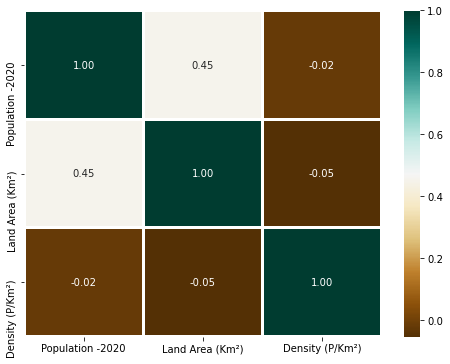

In [14]:
plt.figure(figsize=(8,6))
  
sns.heatmap(df_SA.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

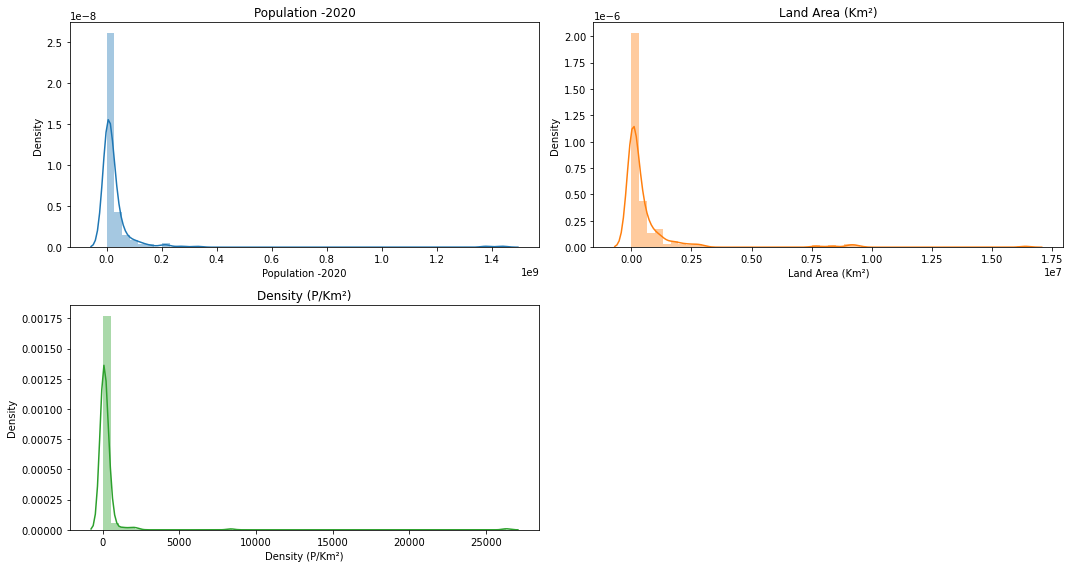

In [15]:
lis = ['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
plt.subplots(figsize=(15, 8))
index = 1

colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # define colors for each plot

for i, color in zip(lis, colors): # use zip to iterate through both lists simultaneously
    plt.subplot(2, 2, index)
    sns.distplot(df_SA[i], color=color)
    plt.title(i)
    index += 1

plt.tight_layout()
plt.show()

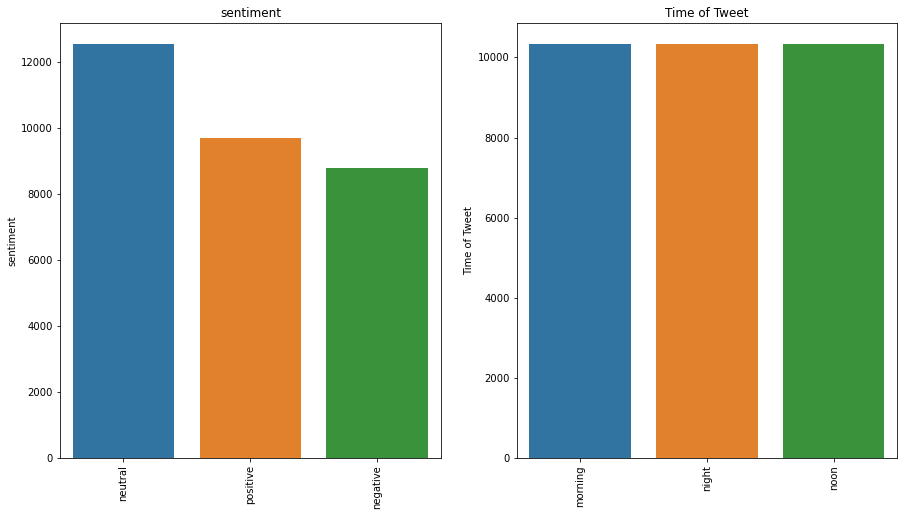

In [16]:
lis2 = ['sentiment', 'Time of Tweet']
fig, axs = plt.subplots(figsize=(15, 8), nrows=1, ncols=2)
for index, col in enumerate(lis2):
    y = df_SA[col].value_counts()
    ax = axs.flat[index]
    ax.set_xticklabels(y.index, rotation=90)
    sns.barplot(x=y.index, y=y, ax=ax)
    ax.set_title(col)

In [17]:
df_SA.isnull().any()

textID               True
text                 True
sentiment            True
Time of Tweet        True
Age of User          True
Country              True
Population -2020    False
Land Area (Km²)     False
Density (P/Km²)     False
dtype: bool

In [18]:
#filling the missing values by using mean, mode and median 
df_SA["text"].fillna(df_SA["text"].mode()[0],inplace = True)
df_SA["sentiment"].fillna(df_SA["sentiment"].mode()[0],inplace = True)
df_SA["Time of Tweet"].fillna(df_SA["Time of Tweet"].mode()[0],inplace = True)
df_SA["Country"].fillna(df_SA["Country"].mode()[0],inplace = True)

In [19]:
# Check if dataframe is empty
if df_SA.empty:
    print("Dataframe is empty!")
else:
    print(df_SA.head())

       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

In [20]:
#checking the null values presented
df_SA.isnull().any()

textID               True
text                False
sentiment           False
Time of Tweet       False
Age of User          True
Country             False
Population -2020    False
Land Area (Km²)     False
Density (P/Km²)     False
dtype: bool

In [21]:
#iloc is used for selecting the rows and columns by integer position
textID_mode = df_SA['textID'].mode().iloc[0]
df_SA['textID'].fillna(textID_mode, inplace=True)

In [22]:
# Convert Age of User column to numeric data type, replacing non-numeric values with NaN
df_SA['Age of User'] = pd.to_numeric(df_SA['Age of User'], errors='coerce')

# Calculate the mean of Age of User column, ignoring NaN values
age_mean = df_SA['Age of User'].mean(skipna=True)

# Fill missing values in Age of User column with the calculated mean
df_SA['Age of User'].fillna(age_mean, inplace=True)

# Fill missing values in textID column with a unique identifier
df_SA['Age of User'].fillna(value='missing_Age of User', inplace=True)

In [23]:
df_SA.isnull().any()

textID              False
text                False
sentiment           False
Time of Tweet       False
Age of User         False
Country             False
Population -2020    False
Land Area (Km²)     False
Density (P/Km²)     False
dtype: bool

In [24]:
df_SA.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,missing_Age of User,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,missing_Age of User,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,missing_Age of User,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,missing_Age of User,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,missing_Age of User,Angola,32866272.0,1246700.0,26.0


In [25]:
df_SA.tail()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
31526,4eac33d1c0,wish we could come see u on Denver husband l...,negative,night,missing_Age of User,Ghana,31072940.0,227540.0,137.0
31527,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative,morning,missing_Age of User,Greece,10423054.0,128900.0,81.0
31528,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive,noon,missing_Age of User,Grenada,112523.0,340.0,331.0
31529,ed167662a5,But it was worth it ****.,positive,night,missing_Age of User,Guatemala,17915568.0,107160.0,167.0
31530,6f7127d9d7,All this flirting going on - The ATG smiles...,neutral,morning,missing_Age of User,Guinea,13132795.0,246000.0,53.0


In [26]:
#string to integer and assisgns unique values by Label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_SA['Age of User'] = le.fit_transform(df_SA["Age of User"])

In [27]:
df_SA.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,0,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,0,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,0,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,0,Angola,32866272.0,1246700.0,26.0


In [28]:
df_SA.tail()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
31526,4eac33d1c0,wish we could come see u on Denver husband l...,negative,night,0,Ghana,31072940.0,227540.0,137.0
31527,4f4c4fc327,I`ve wondered about rake to. The client has ...,negative,morning,0,Greece,10423054.0,128900.0,81.0
31528,f67aae2310,Yay good for both of you. Enjoy the break - y...,positive,noon,0,Grenada,112523.0,340.0,331.0
31529,ed167662a5,But it was worth it ****.,positive,night,0,Guatemala,17915568.0,107160.0,167.0
31530,6f7127d9d7,All this flirting going on - The ATG smiles...,neutral,morning,0,Guinea,13132795.0,246000.0,53.0


In [29]:
#Countvecctorizer is used to train the text docu's for machine learning models by matrix counts
from sklearn.feature_extraction.text import CountVectorizer

# Example training data
train_data = ['text', 'sentiment', 'TimeofTweet', 'Country']

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(train_data)

# Transform the test data
test_data = ["This is the fourth document."]
X_test = vectorizer.transform(test_data)

# Print the feature names and the document-term matrix
print("Feature names:", vectorizer.get_feature_names())
print("Document-term matrix:")
print(X_train.toarray())

Feature names: ['country', 'sentiment', 'text', 'timeoftweet']
Document-term matrix:
[[0 0 1 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]]


In [30]:
#Transforming collection of text documents into matrix TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = vectorizer.fit_transform(train_data)

# Transform the test data
X_test = vectorizer.transform(test_data)

In [31]:
#Genism is designed to handle large text collections and provides simple and efficient tools for processing, analyzing and modeling textual data.
!pip install gensim


[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
#Glove2word2vec for generating the word embeddings and it is NLP application
from gensim.scripts.glove2word2vec import glove2word2vec #(packages keywords are dowloaded and imported to the libraries)
from gensim.models import KeyedVectors

# Convert the GloVe file to Word2Vec format
glove_input_file = 'glove.6B.100d.txt' #keyword file
word2vec_output_file = 'glove.6B.100d.word2vec.txt' #keyword file
glove2word2vec(glove_input_file, word2vec_output_file)

# Load the Word2Vec model
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Convert each document to a matrix of word embeddings
X_train = np.zeros((len(train_data), 100))
for i, doc in enumerate(train_data):
    for word in doc.split():
        if word in model:
            X_train[i] += model[word]
X_test = np.zeros((len(test_data), 100))
for i, doc in enumerate(test_data):
    for word in doc.split():
        if word in model:
            X_test[i] += model[word]

In [33]:
# Preprocess the data
df_SA.dropna(subset=['text', 'sentiment'], inplace=True)
df_SA['sentiment'] = df_SA['sentiment'].apply(lambda x: 1 if x=='positive' else (0 if x=='neutral' else -1))

In [34]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_SA['text'], df_SA['sentiment'], test_size=0.2, random_state=42)

In [35]:
# Vectorize the text data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# -MultinomialNB
.classificattion algorithm in scikit-learn library used for text classification tasks. uses the bayes theorem to compute the probability of each class, given the input data, and then selects the class label with the highest probability.

In [36]:
# Train the model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [37]:
# Evaluate the model
from sklearn.metrics import accuracy_score

# your code here
y_pred = model.predict(X_test).reshape(-1)
accuracy = accuracy_score(y_test, y_pred)

In [38]:
print(accuracy)

0.657364832725543


# -Random forest classifier
.popular ensemble learning algorithm in machine learning that can be used for classification problems. It is based on the idea of creating a large number of decision trees and then combining their results to make a final prediction. Random Forest Classifier is a versatile algorithm that can handle both categorical and continuous input variables.

In [39]:
#Builidng the model using RandomForest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
# On training data
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 0.9990881699968284


In [41]:
predictions = rfc.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[ 954  733  101]
 [ 250 2027  315]
 [  66  525 1336]]
              precision    recall  f1-score   support

          -1       0.75      0.53      0.62      1788
           0       0.62      0.78      0.69      2592
           1       0.76      0.69      0.73      1927

    accuracy                           0.68      6307
   macro avg       0.71      0.67      0.68      6307
weighted avg       0.70      0.68      0.68      6307



# -Decision tree classifier
.the idea of recursively partitioning the input data into smaller subsets based on the values of the input features, until each subset contains only examples that belong to the same class. The result is a tree-like model that can be used to make predictions on new examples.

In [43]:
#Building the model using DecisionTree

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
predictions = dtree.predict(X_test)

In [45]:
#Getting the accuracy score for Decision Tree

from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6269224671000476


In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[1007  607  174]
 [ 527 1622  443]
 [ 148  454 1325]]
              precision    recall  f1-score   support

          -1       0.60      0.56      0.58      1788
           0       0.60      0.63      0.61      2592
           1       0.68      0.69      0.68      1927

    accuracy                           0.63      6307
   macro avg       0.63      0.63      0.63      6307
weighted avg       0.63      0.63      0.63      6307



# -Support vector machine(SVM)
.machine learning algorithm for classification and regression problems. It works by finding the best separating hyperplane that maximally separates the examples of different classes, in a high-dimensional feature space. SVM is particularly useful when the number of input features is high, and the examples are not linearly separable.

In [47]:
#Building the model using Support Vector Machine (SVM)

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [48]:
#Predict
svc_pred = svc_model.predict(X_test)

In [49]:
#Accuracy score for SVM
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.6849532265736483


In [50]:
#Metrics for SVM
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[ 923  799   66]
 [ 211 2147  234]
 [  65  612 1250]]
              precision    recall  f1-score   support

          -1       0.77      0.52      0.62      1788
           0       0.60      0.83      0.70      2592
           1       0.81      0.65      0.72      1927

    accuracy                           0.68      6307
   macro avg       0.73      0.66      0.68      6307
weighted avg       0.71      0.68      0.68      6307



# -Navies bayies GaussianNB
.the algorithm estimates the parameters of the Gaussian distribution for each input feature separately, for each class label.
P(y|x) = P(x|y) * P(y) / P(x)

In [51]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train.toarray(), y_train)

GaussianNB()

In [52]:
y_pred = gnb.predict(X_test.toarray())

In [53]:
y_pred = gnb.predict(X_test.toarray())
print(y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

[-1 -1 -1 ... -1 -1 -1]
Gaussian Naive Bayes model accuracy(in %): 36.19787537656572


In [54]:
#Metrics for GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[1366  223  199]
 [1758  388  446]
 [1179  219  529]]
              precision    recall  f1-score   support

          -1       0.32      0.76      0.45      1788
           0       0.47      0.15      0.23      2592
           1       0.45      0.27      0.34      1927

    accuracy                           0.36      6307
   macro avg       0.41      0.40      0.34      6307
weighted avg       0.42      0.36      0.32      6307



In [55]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from textblob import TextBlob

# Get the 'text' column as a pandas Series object
txt = df_SA['text']

# Apply TextBlob sentiment analysis to each element of the Series
sentiment = txt.apply(lambda x: TextBlob(x).sentiment.polarity)

# Convert sentiment score into a polarity score
polarity = sentiment.apply(lambda x: "positive" if x > 0 else "negative" if x < 0 else "neutral")

print("Sentiment analysis result:", sentiment)
print("Polarity score:", polarity)

Sentiment analysis result: 0        0.000000
1        0.162500
2        0.000000
3        1.000000
4        0.000000
           ...   
31526    0.000000
31527    0.184091
31528    0.366667
31529    0.300000
31530    0.000000
Name: text, Length: 31531, dtype: float64
Polarity score: 0         neutral
1        positive
2         neutral
3        positive
4         neutral
           ...   
31526     neutral
31527    positive
31528    positive
31529    positive
31530     neutral
Name: text, Length: 31531, dtype: object


In [57]:
#Having of the feature importances.

rfc.feature_importances_

array([6.57947028e-05, 7.92910998e-05, 5.93348551e-06, ...,
       2.67276593e-06, 2.21833652e-07, 1.15719460e-05])

In [58]:
#Saving the model predictions
import pickle
 
# Firstly we will be using the dump() function to save the model using pickle!

saved_model = pickle.dumps(rfc)
 
# Then we will be loading that saved model!

rfc_from_pickle = pickle.loads(saved_model)
 
# lastly, after loading that model we will use this to make predictions!

rfc_from_pickle.predict(X_test)

array([ 0,  1,  0, ..., -1,  0,  0], dtype=int64)

In [59]:
df_SA.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,0,morning,0,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,noon,0,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",-1,night,0,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,1,morning,0,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,1,noon,0,Angola,32866272.0,1246700.0,26.0


In [60]:
df_SA.tail()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
31526,4eac33d1c0,wish we could come see u on Denver husband l...,-1,night,0,Ghana,31072940.0,227540.0,137.0
31527,4f4c4fc327,I`ve wondered about rake to. The client has ...,-1,morning,0,Greece,10423054.0,128900.0,81.0
31528,f67aae2310,Yay good for both of you. Enjoy the break - y...,1,noon,0,Grenada,112523.0,340.0,331.0
31529,ed167662a5,But it was worth it ****.,1,night,0,Guatemala,17915568.0,107160.0,167.0
31530,6f7127d9d7,All this flirting going on - The ATG smiles...,0,morning,0,Guinea,13132795.0,246000.0,53.0


In [61]:
#Writing the data python to MsExcel.

df_SA.to_excel('df_SA.xlsx', sheet_name='sheet1', index=False)